In [52]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
import numpy as np

In [53]:
# Load Titanic dataset 
df = pd.read_csv('./breast-cancer-wisconsin.csv')

print(df[df.isna().any(axis=1)]) # shows NaN values in data frame if it exists

df['F6'].replace('?', np.nan, inplace=True)
df.dropna(inplace=True)

df['F6'] = pd.to_numeric(df['F6'], errors='coerce')
df['F6'] = df['F6'].astype(int)

df

Empty DataFrame
Columns: [Sample, F1, F2, F3, F4, F5, F6, F7, F8, F9, Class]
Index: []


/tmp/ipykernel_5713/4016322103.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['F6'].replace('?', np.nan, inplace=True)


,Sample,F1,F2,F3,F4,F5,F6,F7,F8,F9,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
694,776715,3,1,1,1,3,2,1,1,1,2
695,841769,2,1,1,1,2,1,1,1,1,2
696,888820,5,10,10,3,7,3,8,10,2,4
697,897471,4,8,6,4,3,4,10,6,1,4


Class
2    444
4    239
Name: count, dtype: int64
Class
2    444
4    239
Name: count, dtype: int64
Class
2    65.007321
4    34.992679
Name: count, dtype: float64


,Sample,F1,F2,F3,F4,F5,F6,F7,F8,F9,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


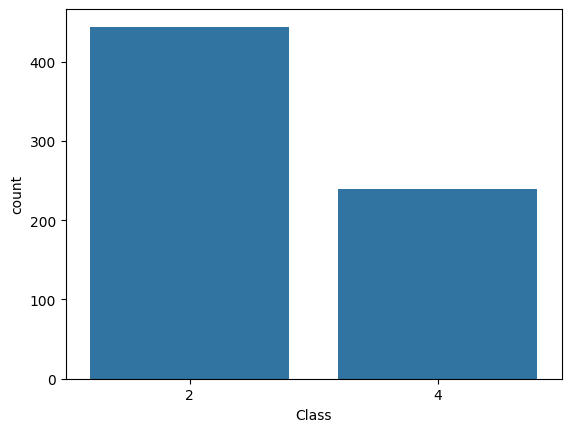

In [54]:
df = pd.get_dummies(df, drop_first=True)

print(df['Class'].value_counts())
print(df['Class'].value_counts())
print((df['Class'].value_counts()/ df['Class'].value_counts().sum()) * 100)
sns.countplot(data=df, x='Class')
df.head()

In [55]:
attr = df.drop(columns=['Class', 'Sample'], axis=1)
target = df['Class']

# Split the data into training and testing sets
attr_train, attr_test, target_train, target_test = train_test_split(attr, target, test_size=0.2, random_state=5)

In [62]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100,random_state=7)


In [57]:
model.fit(attr_train,target_train)
target_pred = model.predict(attr_test)
 

In [61]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
print(f"Accuracy= {accuracy_score(target_test,target_pred)}")

print(confusion_matrix(target_test,target_pred))
print(classification_report(target_test,target_pred))

Accuracy= 0.9854014598540146
[[88  2]
 [ 0 47]]
              precision    recall  f1-score   support

           2       1.00      0.98      0.99        90
           4       0.96      1.00      0.98        47

    accuracy                           0.99       137
   macro avg       0.98      0.99      0.98       137
weighted avg       0.99      0.99      0.99       137



In [58]:
# Export the first three decision trees from the forest
## requires graphviz
# for i in range(3):
#     tree = rf.estimators_[i]
#     dot_data = export_graphviz(tree,
#                                feature_names=X_train.columns,  
#                                filled=True,  
#                                max_depth=2, 
#                                impurity=False, 
#                                proportion=True)
#     graph = graphviz.Source(dot_data)
#     display(graph)

In [56]:

# Feature importance for Mean Decrease Accuracy
mean_decrease_accuracy = model.feature_importances_
print(f"Mean Decrease Accuracy{ mean_decrease_accuracy}")
# # Feature importance for Mean Decrease GINI
# # Note: GINI importance is specific to decision trees and random forests
gini_importance = model.feature_importances_ * model.estimators_[0].tree_.impurity[0]
print(f"\nMean Decrease GINI= {gini_importance}")
 

Mean Decrease Accuracy[0.05171103 0.239507   0.22226855 0.02259108 0.12290567 0.15449826
 0.12080458 0.05915733 0.00655649]

Mean Decrease GINI= [0.02472838 0.114533   0.10628951 0.01080312 0.05877388 0.07388155
 0.05776913 0.02828922 0.00313533]


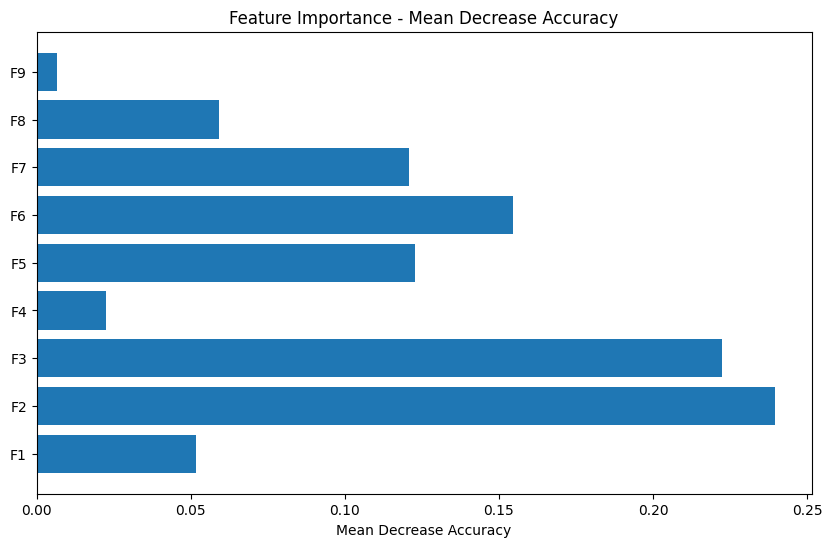

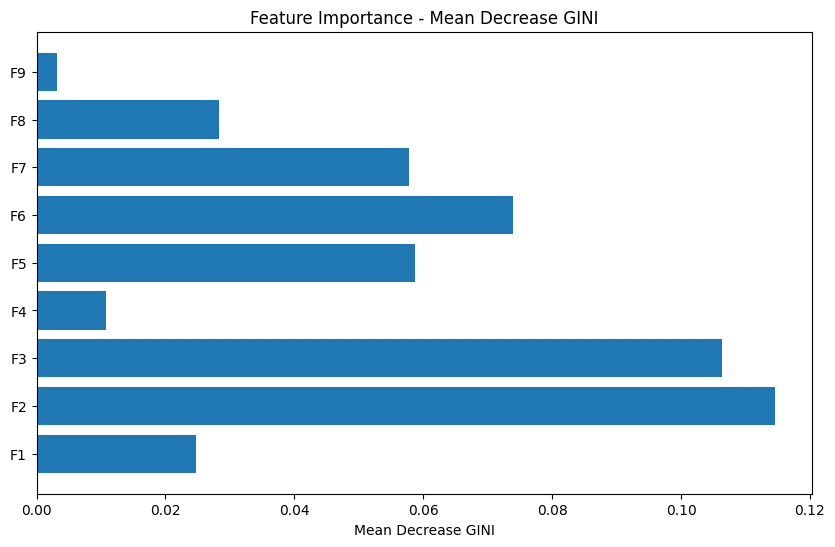

In [59]:
plt.figure(figsize=(10, 6))
plt.barh(range(len(mean_decrease_accuracy)), mean_decrease_accuracy, align='center')
plt.yticks(range(len(mean_decrease_accuracy)), attr.columns)
plt.xlabel('Mean Decrease Accuracy')
plt.title('Feature Importance - Mean Decrease Accuracy')
plt.show()
plt.figure(figsize=(10, 6))
plt.barh(range(len(gini_importance)), gini_importance, align='center')
plt.yticks(range(len(gini_importance)), attr.columns)
plt.xlabel('Mean Decrease GINI')
plt.title('Feature Importance - Mean Decrease GINI')
plt.show()

In [60]:

feature_scores = pd.Series(model.feature_importances_, index=attr_train.columns).sort_values(ascending=False)

print(feature_scores)

F2    0.239507
F3    0.222269
F6    0.154498
F5    0.122906
F7    0.120805
F8    0.059157
F1    0.051711
F4    0.022591
F9    0.006556
dtype: float64


Interperation: 

The F2 Column contributes the most to the model's predictive accuracy since it has a higher mean decrease so it is more critical to maintain accuracy. We see the same thing in the **mean decrease gini** as it improves the purity of nodes in the decision trees within the model. Overall, F2 appears to be the dominant feature for both metrics, indicating it provides the most meaningful information in your model. Features like F3 and F6 also contribute but to a lesser extent, while features like F9 and F4 contribute the least.